In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [66]:
sns.set()
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use('fivethirtyeight')

In [3]:
df_result = pd.read_csv('../data/2019/survey_results_public.csv')
df_result.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [4]:
df_schema = pd.read_csv('../data/2019/survey_results_schema.csv')
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [5]:
df_result.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [6]:
pd.set_option('display.max_colwidth', -1)
df_schema.loc[df_schema['Column'].isin(['ConvertedComp', 'CompTotal', 'CurrencySymbol', 'DevType'])]

,Column,QuestionText
12,DevType,Which of the following describe you? Please select all that apply.
27,CurrencySymbol,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."
29,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
31,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."


In [8]:
df_result[['Country', 'DevType', 'ConvertedComp']]

,Country,DevType,ConvertedComp
0,United Kingdom,NaN,NaN
1,Bosnia and Herzegovina,"Developer, desktop or enterprise applications;Developer, front-end",NaN
2,Thailand,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",8820.0
3,United States,"Developer, full-stack",61000.0
4,Ukraine,"Academic researcher;Developer, desktop or enterprise applications;Developer, full-stack;Developer, mobile",NaN
5,Canada,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Engineer, data",366420.0
6,Ukraine,"Designer;Developer, front-end",NaN
7,India,"Developer, back-end;Engineer, site reliability",NaN
8,New Zealand,"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, QA or test;DevOps specialist",95179.0
9,India,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, game or graphics;Educator",13293.0


In [150]:
comp_country_group = df_result[['Country', 'ConvertedComp']].dropna().groupby(by='Country')

df_comp_count = comp_country_group.count().rename(columns={'ConvertedComp': 'Count'})
df_comp_mean = comp_country_group.mean().round(decimals=2).rename(columns={'ConvertedComp': 'Comp Mean (USD)'})
df_comp_std = comp_country_group.std().round().rename(columns={'ConvertedComp': 'Comp Std. (USD)'})
df_comp_median = comp_country_group.median().round(decimals=2).rename(columns={'ConvertedComp': 'Comp Median (USD)'})
df_comp_max = comp_country_group.max().round().rename(columns={'ConvertedComp': 'Comp Max (USD)'})
df_comp_min = comp_country_group.min().round().rename(columns={'ConvertedComp': 'Comp Min (USD)'})

df_comp_country = pd.concat([df_comp_count, df_comp_mean, df_comp_std, df_comp_median, df_comp_max, df_comp_min], axis=1)
df_comp_country = df_comp_country.sort_values(by='Comp Mean (USD)', ascending=False)

# Add Average Age
df_age_mean = df_result[['Country', 'Age']].groupby(by='Country').mean().round(decimals=1).rename(columns={'Age': 'Avg. Age'})

df_comp_country = df_comp_country.merge(df_age_mean, how='left', on='Country')

df_comp_country

,Count,Comp Mean (USD),Comp Std. (USD),Comp Median (USD),Comp Max (USD),Comp Min (USD),Avg. Age
Country,,,,,,,
Liechtenstein,1,811188.00,NaN,811188.0,811188.0,811188.0,19.5
San Marino,2,301788.00,389848.0,301788.0,577452.0,26124.0,28.5
Ireland,343,250342.24,327004.0,83640.0,1000000.0,0.0,32.5
United States,14981,249546.25,452103.0,110000.0,2000000.0,0.0,32.8
Swaziland,4,242607.50,404386.0,62371.0,843888.0,1800.0,33.7
Timor-Leste,1,229500.00,NaN,229500.0,229500.0,229500.0,28.0
Qatar,6,224692.67,380416.0,79326.0,1000000.0,41196.0,31.9
Republic of Korea,17,204341.12,308667.0,44679.0,1000000.0,2.0,27.7
Norway,418,182298.94,270245.0,79512.0,1000000.0,0.0,32.6


There are countries who has only a few respondants. Remove those countries as not enough data statistically.

In [151]:
df_comp_country_50 = df_comp_country.loc[df_comp_country['Count'] > 50]
df_comp_country_50

,Count,Comp Mean (USD),Comp Std. (USD),Comp Median (USD),Comp Max (USD),Comp Min (USD),Avg. Age
Country,,,,,,,
Ireland,343,250342.24,327004.0,83640.0,1000000.0,0.0,32.5
United States,14981,249546.25,452103.0,110000.0,2000000.0,0.0,32.8
Norway,418,182298.94,270245.0,79512.0,1000000.0,0.0,32.6
Switzerland,672,172675.60,260552.0,95440.0,2000000.0,0.0,30.6
Australia,1247,171541.12,264158.0,79783.0,1000000.0,0.0,32.8
United Kingdom,4034,166182.50,243497.0,68041.0,2000000.0,0.0,32.2
New Zealand,357,151681.80,256561.0,63452.0,1000000.0,0.0,31.7
Canada,2257,134018.56,229256.0,68705.0,2000000.0,0.0,31.4
Singapore,156,120621.51,236636.0,57758.5,2000000.0,3996.0,28.2


There are huge difference between countries. Before doing comparison, the data need cleaned up.
 - Standard Deviation is too high. Most countries has sigma > mean, which is highly scewed to higher side.
 - Max seems to be capped at 1m USD or 2m USD, which would be too high as a develoepr salary
 - Min = 0 should not be considered as they do not earn from coding. 

Next, check how data are distributed in US (higher side), Japan (middle), India (lower side)


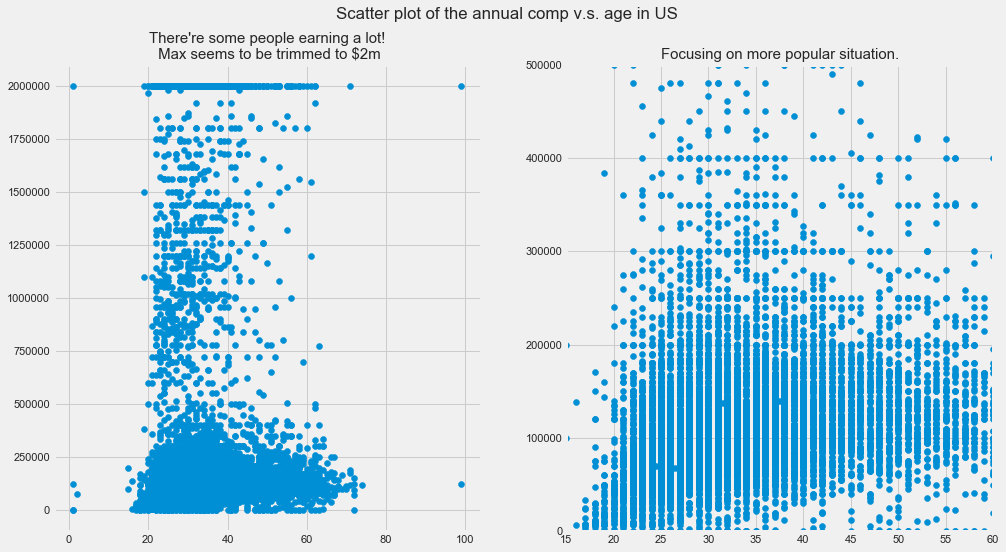

In [152]:
# US Breakdown
df_comp_us = df_result.loc[df_result['Country'] == 'United States', ['ConvertedComp', 'Age']].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(df_comp_us['Age'], df_comp_us['ConvertedComp'])
ax1.set_title("There're some people earning a lot!\n Max seems to be trimmed to $2m", size=15)

ax2.scatter(df_comp_us['Age'], df_comp_us['ConvertedComp'])
ax2.set_xlim(15,60)
ax2.set_ylim(0, 500000)
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in US')
plt.show()

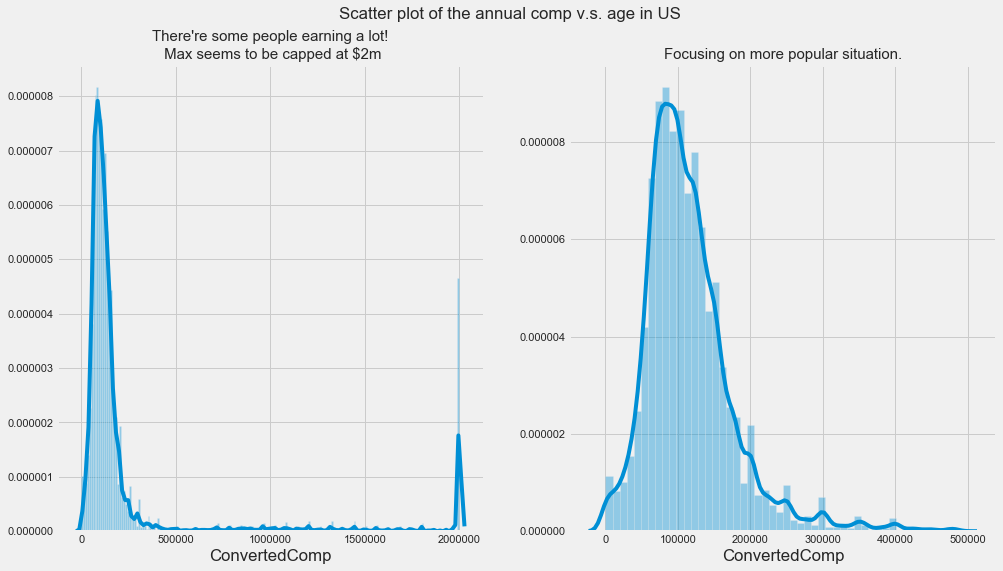

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df_comp_us['ConvertedComp'], bins=200, ax=ax1)
ax1.set_title("There're some people earning a lot!\n Max seems to be capped at $2m", size=15)

sns.distplot(df_comp_us.loc[df_comp_us['ConvertedComp'] < 500000]['ConvertedComp'], ax=ax2)
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in US')
plt.show()

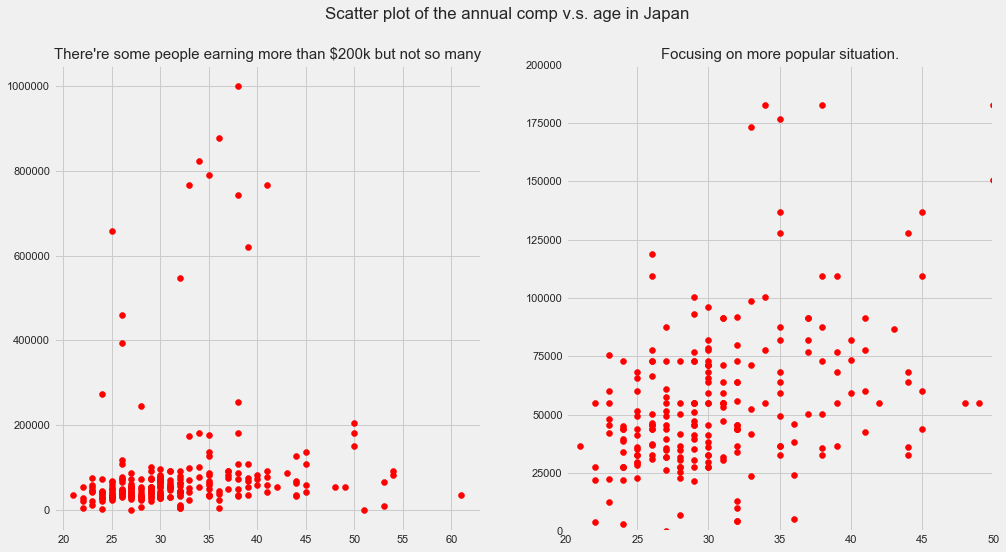

In [154]:
# Japan Breakdown
df_comp_jp = df_result.loc[df_result['Country'] == 'Japan', ['ConvertedComp', 'Age']].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(df_comp_jp['Age'], df_comp_jp['ConvertedComp'], color='red')
ax1.set_title("There're some people earning more than $200k but not so many", size=15)

ax2.scatter(df_comp_jp['Age'], df_comp_jp['ConvertedComp'], color='red')
ax2.set_xlim(20,50)
ax2.set_ylim(0, 200000)
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in Japan')
plt.show()

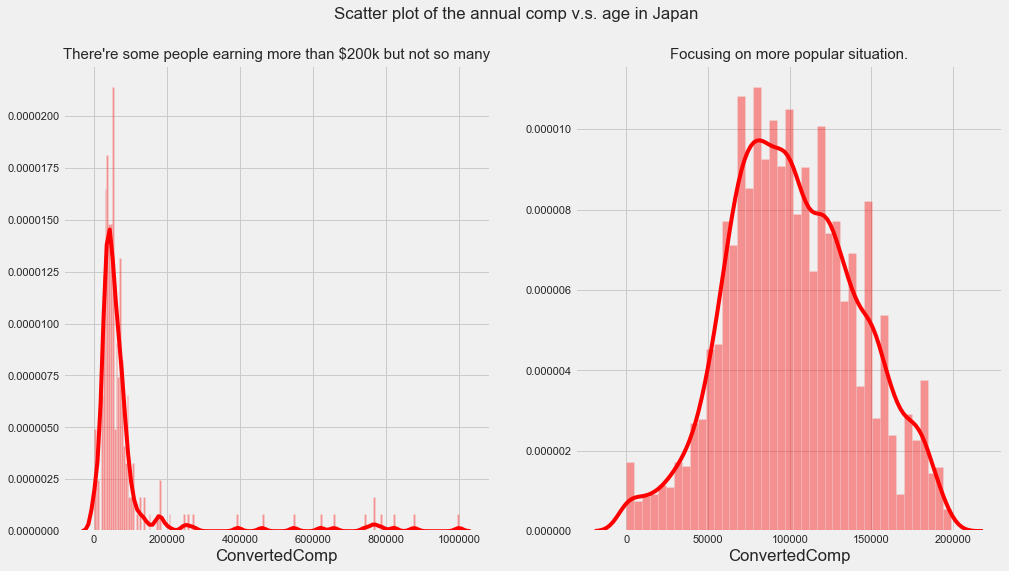

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df_comp_jp['ConvertedComp'], bins=200, ax=ax1, color='red')
ax1.set_title("There're some people earning more than $200k but not so many", size=15)

sns.distplot(df_comp_us.loc[df_comp_us['ConvertedComp'] < 200000]['ConvertedComp'], ax=ax2, color='red')
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in Japan')
plt.show()

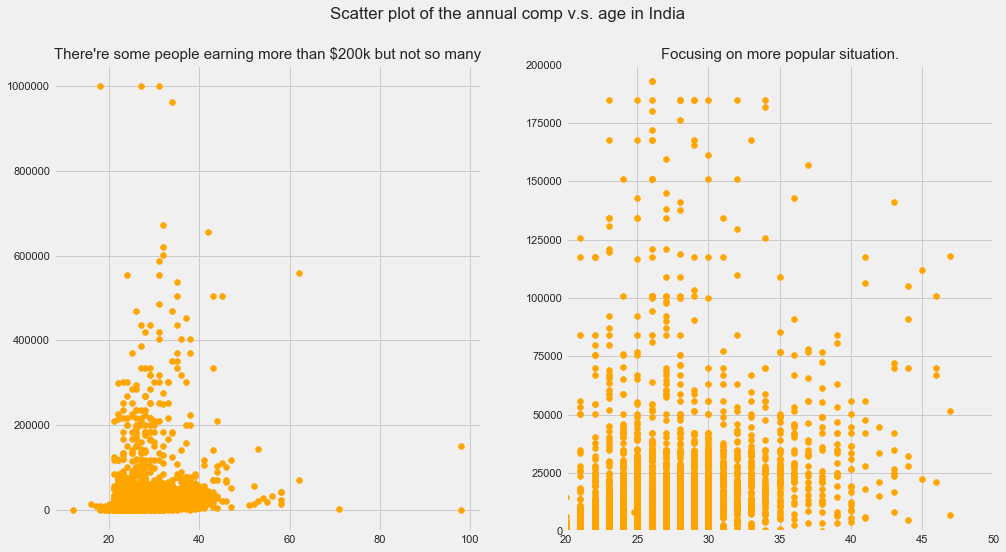

In [156]:
# India Breakdown
df_comp_in = df_result.loc[df_result['Country'] == 'India', ['ConvertedComp', 'Age']].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(df_comp_in['Age'], df_comp_in['ConvertedComp'], color='orange')
ax1.set_title("There're some people earning more than $200k but not so many", size=15)

ax2.scatter(df_comp_in['Age'], df_comp_in['ConvertedComp'], color='orange')
ax2.set_xlim(20,50)
ax2.set_ylim(0, 200000)
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in India')
plt.show()

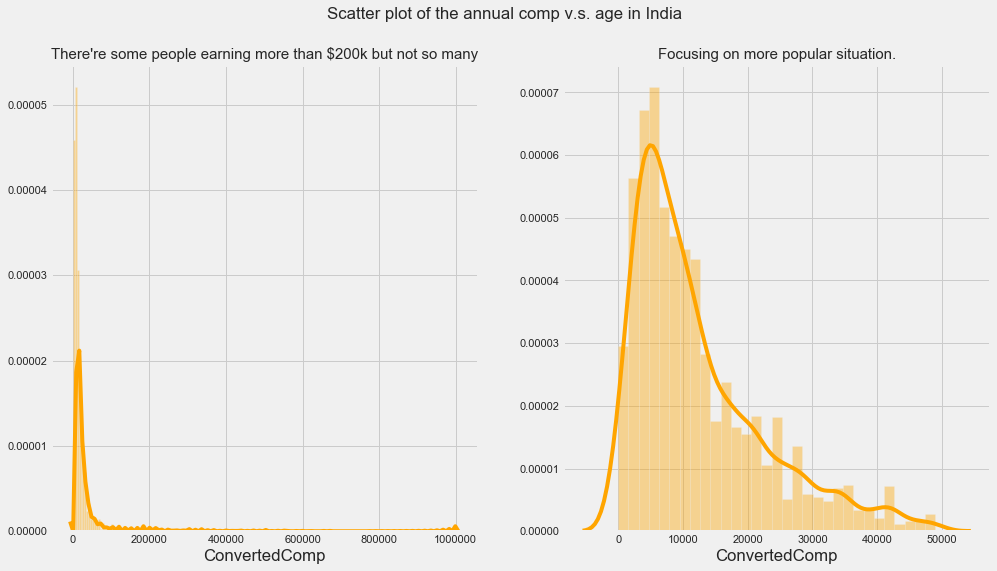

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df_comp_in['ConvertedComp'], bins=200, ax=ax1, color='orange')
ax1.set_title("There're some people earning more than $200k but not so many", size=15)

sns.distplot(df_comp_in.loc[df_comp_in['ConvertedComp'] < 50000]['ConvertedComp'], ax=ax2, color='orange')
ax2.set_title("Focusing on more popular situation.", size=15)

fig.suptitle('Scatter plot of the annual comp v.s. age in India')
plt.show()

In [158]:
# Check what kind of developers claimed more than $500k annual saraly
df_result.loc[df_result['ConvertedComp'] > 500000].sort_values(by='ConvertedComp', ascending=False)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
83693,84216,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course","1,000 to 4,999 employees","Developer, desktop or enterprise applications",6,14,Less than 1 year,Very satisfied,Very satisfied,Very confident,No,No,I am not interested in new job opportunities,Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Diversity of the company or organization",I was preparing for a job search,USD,United States dollar,72500.0,Weekly,2000000.0,40.0,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns","Non-work commitments (parenting, school work, hobbies, etc.);Time spent commuting",Less than once per month / Never,"Other place, such as a coworking space or cafe",Average,No,NaN,"Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,C#,Bash/Shell/PowerShell;C#,NaN,NaN,Windows,Windows,NaN,NaN,.NET;Unity 3D,.NET,Notepad++;Visual Studio,Windows,NaN,Not at all,Useful for immutable record keeping outside of currency,Yes,SIGH,Yes,NaN,Online,Username,2013,A few times per month or weekly,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,No,NaN,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","No, not at all",Just as welcome now as I felt last year,Courses on technologies you're interested in,24.0,"Non-binary, genderqueer, or gender non-conforming",No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
15447,15528,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course;Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",100 to 499 employees,"Developer, front-end;Developer, mobile",6,15,2,Very satisfied,Slightly satisfied,Very confident,Yes,Not sure,"I’m not actively looking, but I am open to new opportunities",1-2 years ago,Complete a take-home project;Interview with people in peer roles,Yes,"Specifi

It looks most of them are mistake in digit. In this case, we should trim such data.

For US, trim those above 500k USD and the other countries at USD 250k USD.

In [159]:
df_result_trimmed = df_result.loc[(df_result['ConvertedComp'] > 1000) &
                                  (((df_result['Country'] == "United States") &
                                   (df_result['ConvertedComp'] < 500000)) |
                                  ((df_result['Country'] != "United States") &
                                   (df_result['ConvertedComp'] < 250000))) &
                                  (df_result['Age'] > 10)
                                  ].sort_values(by='ConvertedComp', ascending=False)

In [160]:
comp_country_group = df_result_trimmed[['Country', 'ConvertedComp']].dropna().groupby(by='Country')

df_comp_count = comp_country_group.count().rename(columns={'ConvertedComp': 'Count'})
df_comp_mean = comp_country_group.mean().round(decimals=2).rename(columns={'ConvertedComp': 'Comp Mean (USD)'})
df_comp_std = comp_country_group.std().round().rename(columns={'ConvertedComp': 'Comp Std. (USD)'})
df_comp_median = comp_country_group.median().round(decimals=2).rename(columns={'ConvertedComp': 'Comp Median (USD)'})
df_comp_max = comp_country_group.max().round().rename(columns={'ConvertedComp': 'Comp Max (USD)'})
df_comp_min = comp_country_group.min().round().rename(columns={'ConvertedComp': 'Comp Min (USD)'})

df_comp_country = pd.concat([df_comp_count, df_comp_mean, df_comp_std, df_comp_median, df_comp_max, df_comp_min], axis=1)
df_comp_country = df_comp_country.sort_values(by='Comp Mean (USD)', ascending=False)

# Add Average Age
df_age_mean = df_result[['Country', 'Age']].groupby(by='Country').mean().round(decimals=1).rename(columns={'Age': 'Avg. Age'})
df_comp_country = df_comp_country.merge(df_age_mean, how='left', on='Country')

# Trim countries having less than 50 respondends
df_comp_country = df_comp_country.loc[df_comp_country['Count'] >= 50]

df_comp_country

,Count,Comp Mean (USD),Comp Std. (USD),Comp Median (USD),Comp Max (USD),Comp Min (USD),Avg. Age
Country,,,,,,,
United States,12922,116319.69,61048.0,105000.0,490000.0,1050.0,32.8
Switzerland,576,90115.32,41609.0,90417.0,241112.0,1005.0,30.6
Israel,538,88802.33,38137.0,91548.0,221028.0,2640.0,32.0
Denmark,392,83781.55,32343.0,82218.0,222500.0,7412.0,32.7
Norway,350,81819.10,29219.0,77022.0,229150.0,1185.0,32.6
Australia,1044,80389.91,36311.0,72530.0,228000.0,1100.0,32.8
Ireland,248,77325.65,36085.0,71036.0,206235.0,6874.0,32.5
Canada,1958,71177.10,33360.0,64888.0,235080.0,1250.0,31.4
United Kingdom,3274,70880.91,39863.0,60190.0,248610.0,1570.0,32.2


Now we have a reasonable data set in terms of compasation of popular situation for developers.

In [172]:
country_list = df_comp_country.index.tolist()
country_list

['United States',
 'Switzerland',
 'Israel',
 'Denmark',
 'Norway',
 'Australia',
 'Ireland',
 'Canada',
 'United Kingdom',
 'New Zealand',
 'Singapore',
 'Germany',
 'Netherlands',
 'Hong Kong (S.A.R.)',
 'Sweden',
 'Japan',
 'Finland',
 'United Arab Emirates',
 'Belgium',
 'Austria',
 'France',
 'South Korea',
 'South Africa',
 'Thailand',
 'Spain',
 'Estonia',
 'Other Country (Not Listed Above)',
 'Uruguay',
 'Slovenia',
 'Italy',
 'Czech Republic',
 'Latvia',
 'Lithuania',
 'Poland',
 'Romania',
 'Slovakia',
 'Chile',
 'Taiwan',
 'Portugal',
 'Bulgaria',
 'China',
 'Hungary',
 'Croatia',
 'Serbia',
 'Belarus',
 'Ukraine',
 'Greece',
 'Lebanon',
 'Ecuador',
 'Russian Federation',
 'Bosnia and Herzegovina',
 'Argentina',
 'Brazil',
 'Colombia',
 'Mexico',
 'Peru',
 'Dominican Republic',
 'Turkey',
 'Malaysia',
 'India',
 'Viet Nam',
 'Kenya',
 'Iran',
 'Philippines',
 'Bangladesh',
 'Egypt',
 'Indonesia',
 'Sri Lanka',
 'Nigeria',
 'Tunisia',
 'Pakistan',
 'Nepal']

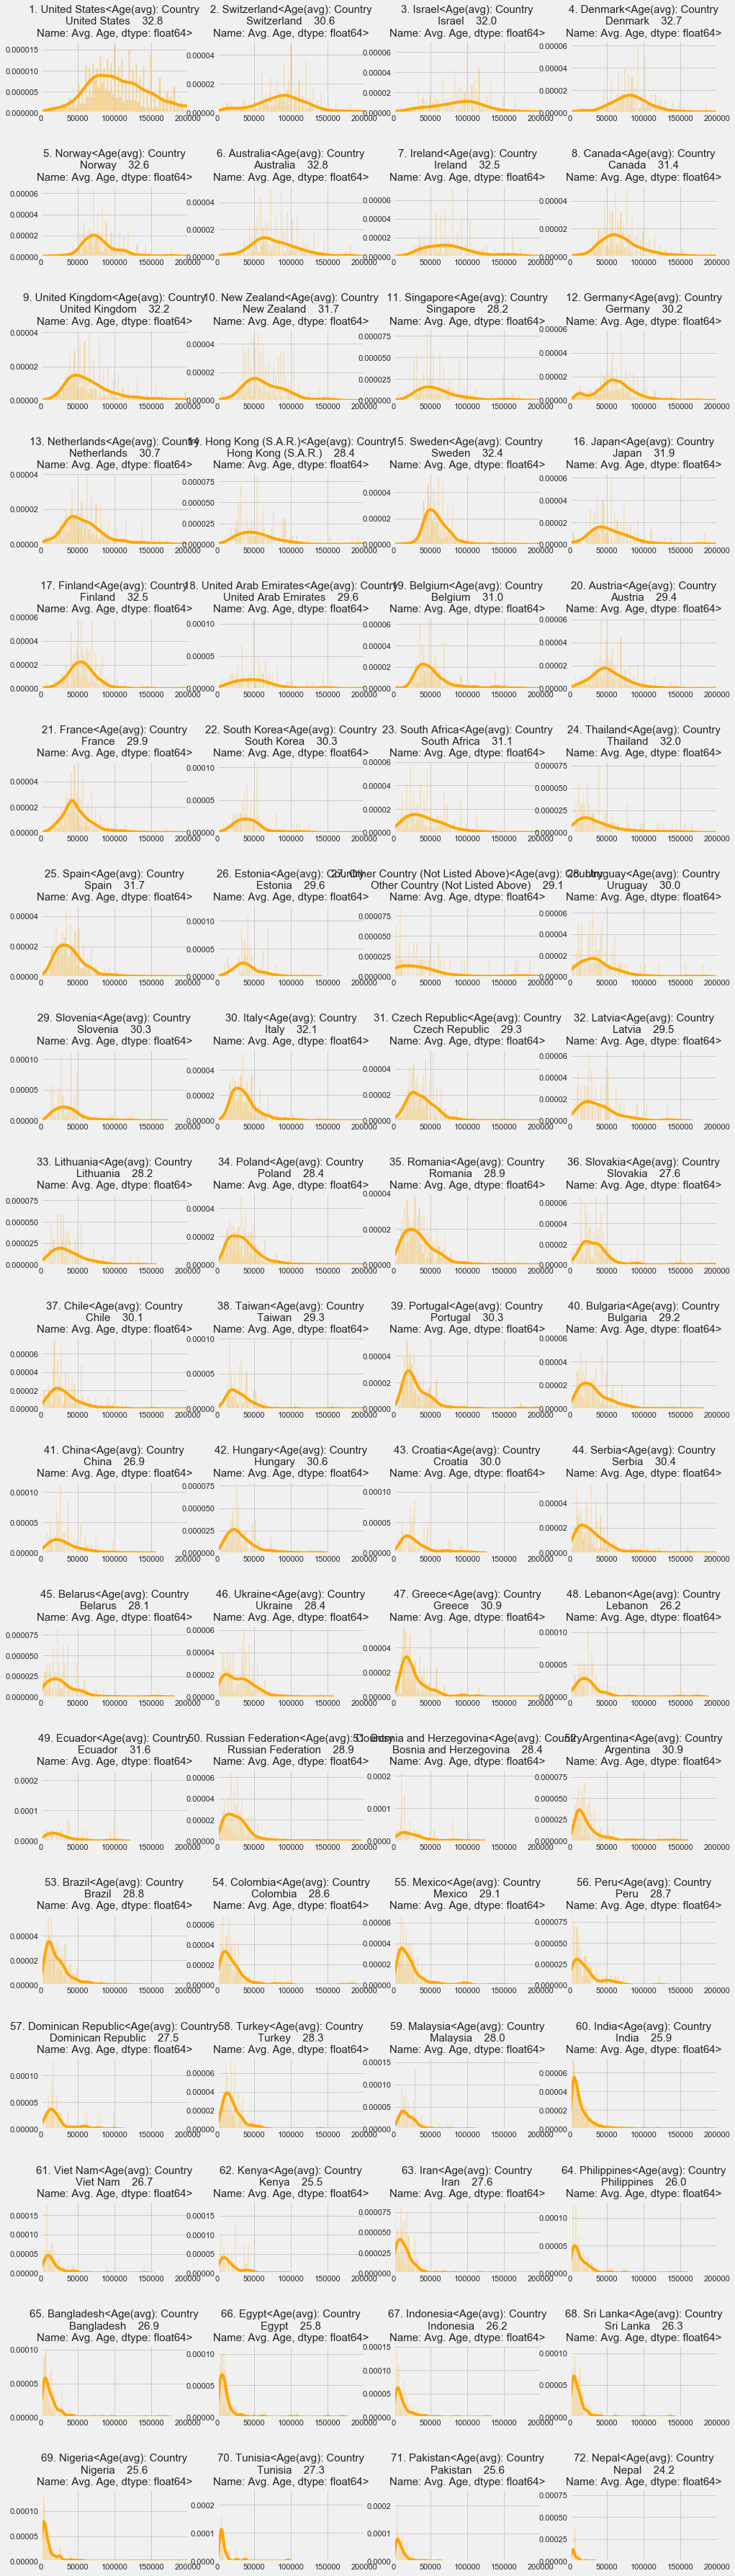

In [185]:
# Plot distribution of all countries
f = plt.figure(figsize=(15,60))
plt.subplots_adjust(wspace=0.2, hspace=1)

for i, country in enumerate(country_list):
    df_comp = df_result_trimmed.loc[df_result_trimmed['Country'] == country, ['ConvertedComp', 'Age']].dropna()
    ax = f.add_subplot(18,4,i+1)
    sns.distplot(df_comp['ConvertedComp'], bins=200, ax=ax, color='orange')
    ax.set_title(str(i+1) + ". " + country + "<Age(avg): " + str(df_comp_country.loc[df_comp_country.index == country, 'Avg. Age']) + ">", size=15)
    ax.set(xlabel='', ylabel='')
    ax.set_xlim(0,200000)